In [1]:
# VGG Visual explanations - Gradcam Gradcam++ Hyperparameters tuning with training Batch normalization- Accuracy ........%

##  VGG - Visual-explanations- Gradcam | Gradcam++   

### Import libraries.

In [12]:
import os

import copy
import warnings
warnings.filterwarnings('ignore')

import cv2
import keras
from keras import backend as K
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Flatten, Input
from keras.layers import Conv2D, Activation, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input , decode_predictions
import matplotlib
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
import shap
import pandas as pd
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
np.random.seed(123)

### Loading Datasets

In [13]:
path = os.path.join( 'D:\\CSE\\6,7, 8 SEMESTERS\\FYP\\IMPLEMENT - NEW\\CNN + Segmentation\\','Nv614_Mel614.zip')
path

'D:\\CSE\\6,7, 8 SEMESTERS\\FYP\\IMPLEMENT - NEW\\CNN + Segmentation\\Nv614_Mel614.zip'

In [14]:
X_df = pd.read_pickle(path)
print("X_df.shape =", X_df.shape)
print("Inspect X_df", os.linesep, X_df.head())

X_df.shape = (1228, 4)
Inspect X_df 
                                                 path   dx  \
0  /home/cseadm/FYP/Notebook/Lahiru/CNN+ SEG/Data...  mel   
1  /home/cseadm/FYP/Notebook/Lahiru/CNN+ SEG/Data...  mel   
2  /home/cseadm/FYP/Notebook/Lahiru/CNN+ SEG/Data...  mel   
3  /home/cseadm/FYP/Notebook/Lahiru/CNN+ SEG/Data...  mel   
4  /home/cseadm/FYP/Notebook/Lahiru/CNN+ SEG/Data...  mel   

                                               image  id  
0  [[[169, 140, 146], [169, 139, 147], [172, 143,...   0  
1  [[[106, 58, 82], [107, 58, 84], [107, 59, 85],...   0  
2  [[[157, 133, 158], [165, 140, 167], [158, 130,...   0  
3  [[[228, 177, 152], [229, 178, 159], [227, 173,...   0  
4  [[[23, 9, 14], [21, 9, 13], [22, 8, 13], [19, ...   0  


In [15]:
X_df.head()

path   dx  \
0  /home/cseadm/FYP/Notebook/Lahiru/CNN+ SEG/Data...  mel   
1  /home/cseadm/FYP/Notebook/Lahiru/CNN+ SEG/Data...  mel   
2  /home/cseadm/FYP/Notebook/Lahiru/CNN+ SEG/Data...  mel   
3  /home/cseadm/FYP/Notebook/Lahiru/CNN+ SEG/Data...  mel   
4  /home/cseadm/FYP/Notebook/Lahiru/CNN+ SEG/Data...  mel   

                                               image  id  
0  [[[169, 140, 146], [169, 139, 147], [172, 143,...   0  
1  [[[106, 58, 82], [107, 58, 84], [107, 59, 85],...   0  
2  [[[157, 133, 158], [165, 140, 167], [158, 130,...   0  
3  [[[228, 177, 152], [229, 178, 159], [227, 173,...   0  
4  [[[23, 9, 14], [21, 9, 13], [22, 8, 13], [19, ...   0

In [16]:
X_df.to_csv('Nv1114_Mel1114.csv')

In [17]:
# df_scv = pd.read_csv('Nv1114_Mel1114.csv')


In [18]:
# df_scv

MEL 0: 614
NV  1: 614
Proportion: 1.0 : 1


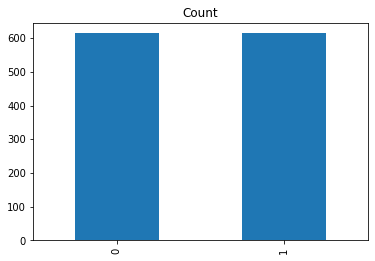

In [19]:
count = X_df.id.value_counts()
print('MEL 0:', count[0])
print('NV  1:', count[1])
print('Proportion:', round(count[0] / count[1], 2), ': 1')

count.plot(kind='bar', title='Count');

In [20]:
num_images=X_df['image'].shape
num_images

(1228,)

In [21]:
# Class count
count_class_1, count_class_0 = X_df.id.value_counts()

# Divide by class
df_class_0 = X_df[X_df['id'] == 0]
df_class_1 = X_df[X_df['id'] == 1]

In [22]:
df_class_0.head()

path   dx  \
0  /home/cseadm/FYP/Notebook/Lahiru/CNN+ SEG/Data...  mel   
1  /home/cseadm/FYP/Notebook/Lahiru/CNN+ SEG/Data...  mel   
2  /home/cseadm/FYP/Notebook/Lahiru/CNN+ SEG/Data...  mel   
3  /home/cseadm/FYP/Notebook/Lahiru/CNN+ SEG/Data...  mel   
4  /home/cseadm/FYP/Notebook/Lahiru/CNN+ SEG/Data...  mel   

                                               image  id  
0  [[[169, 140, 146], [169, 139, 147], [172, 143,...   0  
1  [[[106, 58, 82], [107, 58, 84], [107, 59, 85],...   0  
2  [[[157, 133, 158], [165, 140, 167], [158, 130,...   0  
3  [[[228, 177, 152], [229, 178, 159], [227, 173,...   0  
4  [[[23, 9, 14], [21, 9, 13], [22, 8, 13], [19, ...   0

### Random Under-sampling

In [23]:
# Random over-sampling
df_class_0_over = df_class_0
df_class_1_under = df_class_1.sample(614, replace=True)

df_over_sampling = pd.concat([df_class_1_under, df_class_0_over],  ignore_index=True,axis=0)

print('Random over-sampling:')
print(df_over_sampling.id.value_counts())

df_over_sampling.id.value_counts().plot(kind='bar', title='Count ');

Random over-sampling:
1    614
0    614
Name: id, dtype: int64


In [24]:
df_over_sampling

path   dx  \
0     /home/cseadm/FYP/Notebook/Lahiru/CNN+ SEG/Data...   nv   
1     /home/cseadm/FYP/Notebook/Lahiru/CNN+ SEG/Data...   nv   
2     /home/cseadm/FYP/Notebook/Lahiru/CNN+ SEG/Data...   nv   
3     /home/cseadm/FYP/Notebook/Lahiru/CNN+ SEG/Data...   nv   
4     /home/cseadm/FYP/Notebook/Lahiru/CNN+ SEG/Data...   nv   
...                                                 ...  ...   
1223  /home/cseadm/FYP/Notebook/Lahiru/CNN+ SEG/Data...  mel   
1224  /home/cseadm/FYP/Notebook/Lahiru/CNN+ SEG/Data...  mel   
1225  /home/cseadm/FYP/Notebook/Lahiru/CNN+ SEG/Data...  mel   
1226  /home/cseadm/FYP/Notebook/Lahiru/CNN+ SEG/Data...  mel   
1227  /home/cseadm/FYP/Notebook/Lahiru/CNN+ SEG/Data...  mel   

                                                  image  id  
0     [[[253, 180, 196], [254, 177, 195], [253, 180,...   1  
1     [[[206, 108, 106], [205, 109, 103], [202, 104,...   1  
2     [[[219, 135, 149], [215, 139, 145], [220, 140,...   1  
3     [[[229, 135, 160], [232, 138, 164], [231, 134,...   1  
4     [[[217, 134, 131], [213, 134, 132], [212, 126,...   1  
...                                                 ...  ..  
1223  [[[189, 150, 143], [188, 153, 147], [193, 156,...   0  
1224  [[[82, 64, 70], [98, 69, 89], [101, 80, 92], [...   0  
1225  [[[162, 102, 101], [165, 104, 104], [169, 107,...   0  
1226  [[[71, 49, 56], [90, 63, 72], [102, 74, 81], [...   0  
1227  [[[209, 191, 211], [207, 192, 213], [209, 193,...   0  

[1228 rows x 4 columns]

In [25]:
# Store number of images in the dataset
num_images = df_over_sampling.shape[0]
num_classes = 2
print(num_images)

1228


In [26]:
# Get y, a vector containing the classes for each image
y = df_over_sampling.pop('id')

In [27]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1223    0
1224    0
1225    0
1226    0
1227    0
Name: id, Length: 1228, dtype: int64

In [28]:
# Allocate space for all images
X = np.empty((num_images, 224, 224, 3),dtype='uint8')

In [29]:
for i in range(0, num_images):
      
    X[i, :, :, :] = np.reshape(df_over_sampling['image'][i], (224, 224, 3)) 

print(y[:].value_counts())

print("X.shape =", X.shape)
print("y.shape =", y.shape)

1    614
0    614
Name: id, dtype: int64
X.shape = (1228, 224, 224, 3)
y.shape = (1228,)


In [30]:
df_over_sampling['image'][0].shape

(224, 224, 3)

In [31]:
X.shape, y.shape

((1228, 224, 224, 3), (1228,))

### Visualize some images / labels for each classes.

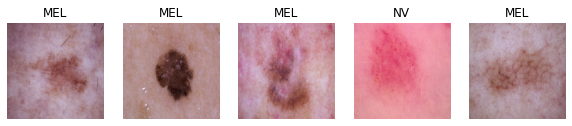

In [32]:
# visualize some images / labels
class_names = ['MEL', 'NV']

W_grid=5
L_grid=1
fig,axes = plt.subplots(L_grid,W_grid,figsize=(10,10))
axes=axes.ravel()
n_training=len(X)
for i in np.arange(0,L_grid * W_grid):
    index=np.random.randint(0,n_training) #Pick a random number 
    axes[i].imshow(X[index])
#     print(y_train[index].tolist())
    axes[i].set_title(class_names[y[index]]) #Prints labels on top of the picture
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

### Split datasets to train and test.

In [33]:
## split train / test

# indices_train, indices_test = train_test_split(list(range(X.shape[0])), train_size=0.8, test_size=0.2, random_state=28)

# x_train = X[indices_train]
# y_train = y[indices_train]
# x_test = X[indices_test]
# y_test = y[indices_test]

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.10,random_state=28)
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=0.112,random_state=28)


print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_val.shape, y_val.shape)


(981, 224, 224, 3) (981,)
(123, 224, 224, 3) (123,)
(124, 224, 224, 3) (124,)


### Label Encoding & Augmentation.

In [34]:
n_classes=2
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)
y_val = keras.utils.to_categorical(y_val , n_classes)

y_train.shape, y_test.shape, y_val.shape

((981, 2), (123, 2), (124, 2))

In [35]:
# list(y_test)

In [36]:
## to image data generator

datagen_train = ImageDataGenerator(
    preprocessing_function=preprocess_input, # image preprocessing function
    rotation_range=30,                       # randomly rotate images in the range
    horizontal_flip=True,                    # randomly flip images horizontally
    vertical_flip=False,                     # randomly flip images vertically
)

datagen_val = ImageDataGenerator(
    preprocessing_function=preprocess_input, # image preprocessing function
)

datagen_test = ImageDataGenerator(
    preprocessing_function=preprocess_input, # image preprocessing function
)

## Hyperparameter Tuning (Bayesian optimization using Gaussian Processes.)

In [37]:
from skopt.space import Real, Integer, Categorical
from skopt.utils import use_named_args
from skopt import gp_minimize
import keras.backend as K

space = [Real(1e-6, 0.01, "log-uniform", name='learning_rate'),
          Real(0.1, 0.8, name='dropout'),
          Real(0.8, 1.0, name='momentum'),
          Real(0.9, 1.0, name='beta_1'),
          Real(0.99, 1.0, name='beta_2'),
          Integer(low=1,high=100, name = 'epochs'),
          Integer(low=50, high=225, name='num_dense_nodes'),
          Categorical(categories=[ 'Adam'],
                             name='optimizer_type')
          ]

In [38]:
import os
import tempfile
import tensorflow as tf

def add_regularization(model, regularizer=tf.keras.regularizers.l2(0.0001)):

    if not isinstance(regularizer, tf.keras.regularizers.Regularizer):
      print("Regularizer must be a subclass of tf.keras.regularizers.Regularizer")
      return model

    for layer in model.layers:
        for attr in ['kernel_regularizer']:
            if hasattr(layer, attr):
              setattr(layer, attr, regularizer)

    # When we change the layers attributes, the change only happens in the model config file
    model_json = model.to_json()

    # Save the weights before reloading the model.
    tmp_weights_path = os.path.join(tempfile.gettempdir(), 'tmp_weights.h5')
    model.save_weights(tmp_weights_path)

    # load the model from the config
    model = tf.keras.models.model_from_json(model_json)
    
    # Reload the model weights
    model.load_weights(tmp_weights_path, by_name=True)
    return model

In [29]:
from keras.optimizers import Adam, SGD

W=224
H=224

def make_model(learning_rate, dropout, momentum, beta_1, beta_2,
               num_dense_nodes, optimizer_type):
    """build model function"""
    print("Start MK")
    # VGG
    input_tensor = Input(shape=(W, H, 3)) # To change input shape
    VGG = VGG16(
        include_top=False,                # To change output shape
        weights='imagenet',               # Use pre-trained model
        input_tensor=input_tensor,        # Change input shape for this task
    )
    
    # frozen weights
    for layer in VGG.layers[:-10]:
        layer.trainable = False or isinstance(layer, BatchNormalization) # If Batch Normalization layer, it should be trainable

    # Add extra dense layers
    x = VGG.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(num_dense_nodes, activation='relu', kernel_initializer='he_normal')(x)
    x = Dropout(rate=dropout)(x)
    predictions = Dense(n_classes, activation='sigmoid')(x)
    model = Model(inputs=VGG.input, outputs=predictions)
    
    model=add_regularization(model)
    
    if optimizer_type == "Adam":
        optimizer = Adam(lr=learning_rate, beta_1=beta_1, beta_2=beta_2)
    elif optimizer_type == "SGD":
        optimizer = SGD(lr=learning_rate, momentum=momentum)

    model.compile(loss='binary_crossentropy',
          optimizer=optimizer,
          metrics=['accuracy'])

    return model

In [ ]:
model = make_model(learning_rate=5.5e-06, 
                         dropout=0.5631008394959407, 
                         momentum=0.9, 
                         beta_1=0.999, beta_2=0.999,
                         num_dense_nodes=204, 
                         optimizer_type='Adam')



# model = make_model(learning_rate=1.3e-04, 
#                          dropout=0.5533474631050721, 
#                          momentum=0.9, 
#                          beta_1=0.999, beta_2=0.999,
#                          num_dense_nodes=171, 
#                          optimizer_type='Adam')


history=model.fit_generator(
        datagen_train.flow(x_train, y_train, batch_size=32),
        epochs=73,
        steps_per_epoch = int( np.ceil(x_train.shape[0] / 32) ),  
        validation_data=datagen_val.flow(x_val, y_val, batch_size=32))

Start MK
Epoch 1/73
31/31 [==============================] - 450s 14s/step - loss: 1.3751 - accuracy: 0.5708 - val_loss: 0.7970 - val_accuracy: 0.7581
Epoch 2/73
31/31 [==============================] - 441s 14s/step - loss: 0.8452 - accuracy: 0.6779 - val_loss: 0.7163 - val_accuracy: 0.8952
Epoch 3/73
31/31 [==============================] - 428s 14s/step - loss: 0.7276 - accuracy: 0.8247 - val_loss: 0.6332 - val_accuracy: 0.9194
Epoch 4/73
31/31 [==============================] - 448s 14s/step - loss: 0.6359 - accuracy: 0.8848 - val_loss: 0.5149 - val_accuracy: 0.9597
Epoch 5/73
31/31 [==============================] - 445s 14s/step - loss: 0.5443 - accuracy: 0.9205 - val_loss: 0.3901 - val_accuracy: 0.9677
Epoch 6/73
31/31 [==============================] - 428s 14s/step - loss: 0.4429 - accuracy: 0.9419 - val_loss: 0.3207 - val_accuracy: 0.9516
Epoch 7/73
31/31 [==============================] - 427s 14s/step - loss: 0.3995 - accuracy: 0.9511 - val_loss: 0.2801 - val_accuracy: 0.95

In [ ]:
# n_trials = 2

# batch_size = 32
# best_accuracy = {} 
# for seed in range(n_trials):
#     best_accuracy[seed] = 0.0

# for seed in range(n_trials):
#     print('We are currently training on seed:', seed)
#     # for each iteration of the hyperparameter search, return a set of parameters
#     # and feed them into the relevant parts
#     # run training of the model for this seed, save with seed num
#     ##---------> #  X_train, y_train, X_test, y_test = data_splits[seed]
#     path_best_model = 'Xception_saved_trial_{}.h5'.format(seed)
    
#     @use_named_args(dimensions=space)
#     def fitness(learning_rate, dropout, momentum, beta_1, beta_2,
#                num_dense_nodes, optimizer_type, epochs):
#         # Print the hyper-parameters.
#         print('learning rate: {0:.1e}'.format(learning_rate))
#         print('num_dense_nodes:', num_dense_nodes)
#         print('dropout:', dropout)
#         print('optimizer_type:', optimizer_type)
#         print('epochs:', epochs)
        
#         # Create the neural network with these hyper-parameters.
#         model = make_model(learning_rate=learning_rate, 
#                          dropout=dropout, 
#                          momentum=momentum, 
#                          beta_1=beta_1, beta_2=beta_2,
#                          num_dense_nodes=num_dense_nodes, 
#                          optimizer_type=optimizer_type)
#         # Use Keras to train the model.
# #         history = model.fit(x=x_train,
# #                           y=y_train,
# #                           epochs=epochs,
# #                           batch_size=batch_size,
# #                           validation_data= (x_val,y_val))
        
#         history=model.fit_generator(
#         datagen_train.flow(x_train, y_train, batch_size=32),
#         epochs=epochs,
#         steps_per_epoch = int( np.ceil(x_train.shape[0] / batch_size) ),  
#         validation_data=datagen_val.flow(x_val, y_val, batch_size=32))
    

#         # Get the classification accuracy on the validation-set
#         # after the last training-epoch.
#         accuracy = history.history['val_accuracy'][-1]
        
#         # Print the classification accuracy.
#         print()
#         print("Accuracy: {0:.2%}".format(accuracy))
#         print()
        
#         # Save the model if it improves on the best-found performance.
#         # We use the global keyword so we update the variable outside
#         # of this function.
#         global best_accuracy
#         global best_history_1
#         global best_history_2
        
        
#         if accuracy > best_accuracy[seed]:
#             # Save the new model to harddisk, again change /PathToOutputDirectory to your path
#             model_path = os.path.join('D:\\FYP\\Models\\7\\', path_best_model)
#             model.save(model_path)
            
#             if(seed==0):
#                 best_history_1=history
#             else:
#                 best_history_2=history                
                
            
#             np.save('Xception_saved_trial_history_{}.npy'.format(seed),history.history)
            
#             # Update the classification accuracy.
#             best_accuracy[seed] = accuracy
            
#         # Delete the Keras model with these hyper-parameters from memory.
#         del model
        
#         K.clear_session()
        
#         return -accuracy
    
    
#     #This conducts the hyperparameter search over each data split for details see: https://scikit-optimize.github.io/#skopt.gp_minimize
#     search_result = gp_minimize(func=fitness,
#                                 dimensions=space,
#                                 acq_func='EI', # Expected Improvement.
#                                 n_calls=3,
#                                 n_random_starts = 3,
#                                 verbose = True)
#     print('Seed: ',seed)
#     print("BEST ACCURACY: ", best_accuracy)
#     print('hyper_params ', search_result.x)

In [ ]:
# learning rate: 5.5e-06
# num_dense_nodes: 204
# dropout: 0.5631008394959407
# optimizer_type: Adam
# epochs: 73

In [39]:
model_path = os.path.join('D:\\CSE\\6,7, 8 SEMESTERS\\FYP\\IMPLEMENT - NEW\\CNN + Segmentation\\models\\','VGG19_1.h5')
model.save(model_path)

NameError: name 'model' is not defined

 ### Analysis training and validation results

In [38]:
label_to_class = {
    'Mel': 0,
    'Nv' : 1}

In [39]:
class_to_label = {v: k for k, v in label_to_class.items()}

### Load saved  best model

In [41]:
import tensorflow as tf
model= tf.keras.models.load_model('D:\\CSE\\6,7, 8 SEMESTERS\\FYP\\IMPLEMENT - NEW\\CNN + Segmentation\\models\\VGG19_1.h5')

In [32]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

 #### confusion matrix

In [36]:
## plot confusion matrix

x = preprocess_input(copy.deepcopy(x_test))
y_preds = model.predict(x)
y_preds = np.argmax(y_preds, axis=1)
y_trues = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_trues, y_preds)


4/4 [==============================] - 48s 12s/step


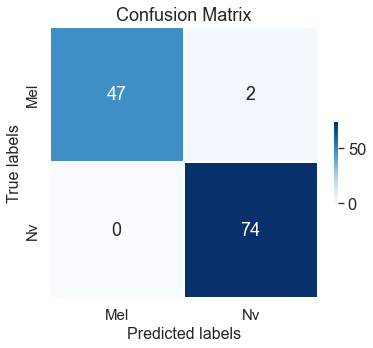

In [40]:
fig, ax = plt.subplots(figsize=(6, 5))


ax = plt.subplot()
sns.set(font_scale=1.5) # Adjust to fit
# sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="g");  
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar_kws={'shrink': .3}, linewidths=.1, ax=ax)

# Labels, title and ticks
label_font = {'size':'16'}  # Adjust to fit
ax.set_xlabel('Predicted labels', fontdict=label_font);
ax.set_ylabel('True labels', fontdict=label_font);

title_font = {'size':'18'}  # Adjust to fit
ax.set_title('Confusion Matrix', fontdict=title_font);

ax.tick_params(axis='both', which='major', labelsize=15)  # Adjust to fit
ax.xaxis.set_ticklabels(list(label_to_class.keys()));
ax.yaxis.set_ticklabels(list(label_to_class.keys()));
plt.show()

#### classification report

In [41]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import tensorflow as tf

In [42]:
print("Accuracy: {:.2f}%".format(accuracy_score(y_trues, y_preds) * 100))

Accuracy: 98.37%


In [43]:
print(classification_report(y_trues, y_preds))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        49
           1       0.97      1.00      0.99        74

    accuracy                           0.98       123
   macro avg       0.99      0.98      0.98       123
weighted avg       0.98      0.98      0.98       123



In [44]:
#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix

total=sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity)

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)


Accuracy :  0.983739837398374
Sensitivity :  0.9591836734693877
Specificity :  1.0


### Graphing our training and validation

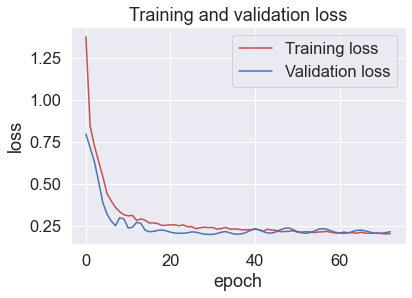

In [45]:
history=history
history.history.keys()

#Graphing our training and validation
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend()
plt.show()

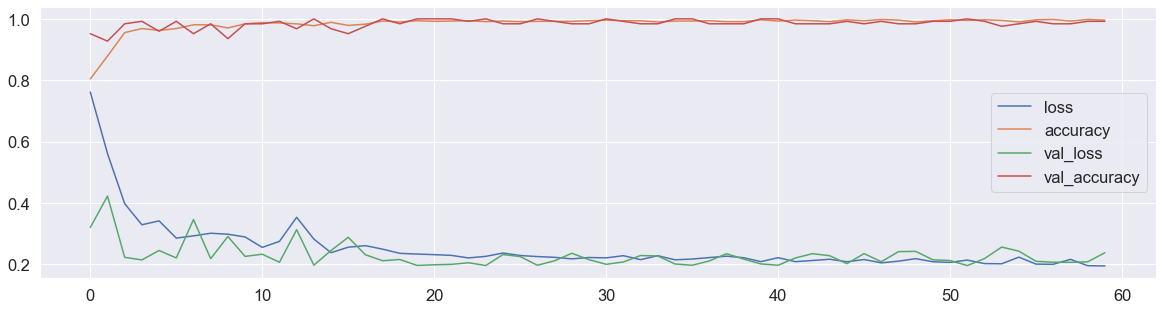

In [54]:
pd.DataFrame(history).plot(figsize=(20,5))
plt.show()

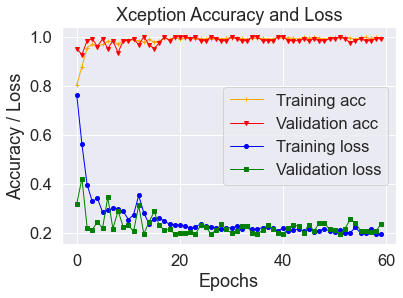

In [50]:
history=history.history

#Graphing our training and validation
accuracy = history['accuracy']
val_accuracy = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Training acc',color='orange', linewidth = 1, marker='+', markerfacecolor='orange', markersize=4)
plt.plot(epochs, val_accuracy, 'b', label='Validation acc',color='red', linewidth = 1, marker='v', markerfacecolor='red', markersize=4)
plt.title('Training and validation accuracy')

plt.plot(epochs, loss, label='Training loss',color='blue', linewidth = 1, marker='o', markerfacecolor='blue', markersize=4)
plt.plot(epochs, val_loss, 'b', label='Validation loss',color='green', linewidth = 1, marker='s', markerfacecolor='green', markersize=4)
plt.title('Training and validation loss')
plt.title('Xception Accuracy and Loss')
plt.ylabel('Accuracy / Loss') 
plt.xlabel('Epochs')
plt.legend()
plt.show()

##### ROC and AUC

In [42]:
from tqdm import tqdm
import gc
tta_steps = 10
predictions = []

for i in tqdm(range(tta_steps)):
    preds = model.predict_generator(datagen_test.flow(x_test, batch_size=32, shuffle=False),steps = len(x_test)/32)    
    predictions.append(preds)
    gc.collect()
    
Y_pred_tta = np.mean(predictions, axis=0)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [07:17<00:00, 43.73s/it]


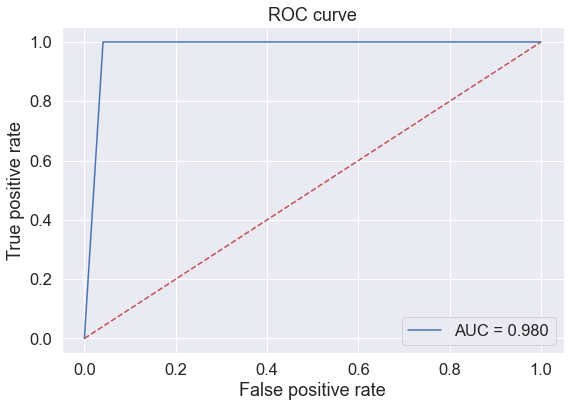

In [45]:
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve
roc_log = roc_auc_score(np.argmax(y_test, axis=1), np.argmax(Y_pred_tta, axis=1))
false_positive_rate, true_positive_rate, threshold = roc_curve(np.argmax(y_test, axis=1), np.argmax(Y_pred_tta, axis=1))
area_under_curve = auc(false_positive_rate, true_positive_rate)

fig, ax = plt.subplots(figsize=(9, 6))


ax = plt.subplot()
sns.set(font_scale=1.5) 
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = {:.3f}'.format(area_under_curve))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
plt.close()

 #### Save Model

 #### Prediction using Xception

In [103]:
# Input image path

pathf="ISIC_0032985.JPG"
img = np.array(load_img(pathf,target_size=(224,224)),dtype=np.float64)
img = np.expand_dims(img,axis=0)
img = preprocess_input(img)
predictions = model_100_1.predict(img)

1/1 [==============================] - 1s 779ms/step


In [104]:
# Prediction using Xception
class_names = ['MEL', 'NV']

pred_canser=class_names[np.argmax(predictions)]
pred_canser

'MEL'

In [105]:
predictions

array([[0.7524724, 0.2634424]], dtype=float32)

#### Implement Grad-CAM, Grad-CAM++ .First, implement the function to superimpose original image and heatmap of each cams.

In [46]:
from tensorflow.python.framework.ops import disable_eager_execution

In [89]:
def superimpose(img, cam):
    """superimpose original image and cam heatmap"""
    
    heatmap = cv2.resize(cam, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    superimposed_img = heatmap * .5 + img * .5
    superimposed_img = np.minimum(superimposed_img, 255.0).astype(np.uint8)  # scale 0 to 255  
    superimposed_img = cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB)
    
    return img, heatmap, superimposed_img

In [87]:
# def superimpose(img, cam):
#     """superimpose original image and cam heatmap"""
    
#     heatmap = cv2.resize(cam, (img.shape[1], img.shape[0]))
#     heatmap = np.uint8(255 * heatmap)
#     heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

#     superimposed_img = heatmap 
#     superimposed_img = np.minimum(superimposed_img, 255.0).astype(np.uint8)  # scale 0 to 255  
# #   superimposed_img = cv2.cvtColor(superimposed_img, cv2.gray)
#     superimposed_img = cv2.cvtColor(superimposed_img,cv2.IMREAD_GRAYSCALE )
# #     image = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY )
    
#     return img, heatmap, superimposed_img



In [76]:
def _plot(model, cam_func, img, cls_true):
    """plot original image, heatmap from cam and superimpose image"""
    original_img=img
    # for cam
    x = np.expand_dims(img, axis=0)
    x = preprocess_input(copy.deepcopy(x))

    # for superimpose
    img = np.uint8(img)

    # cam / superimpose
    cls_pred, cam = cam_func(model=model, x=x, layer_name=model.layers[-2].name)
    img, heatmap, superimposed_img = superimpose(img, cam)

    fig, axs = plt.subplots(ncols=2, figsize=(9, 4))

    axs[0].imshow(original_img)
    axs[0].set_title('original image')
    axs[0].axis('off')

    axs[1].imshow(superimposed_img)
    axs[1].set_title('superimposed image')
    axs[1].axis('off')

#     axs[2].imshow(superimposed_img)
#     axs[2].set_title('superimposed image')
#     axs[2].axis('off')

    plt.suptitle('True label: ' + class_to_label[cls_true] + ' / Predicted label : ' + class_to_label[cls_pred])
    plt.tight_layout()
    plt.show()

#### Grad-CAM:


In [49]:
## Grad-CAM function

def grad_cam(model, x, layer_name):
    """Grad-CAM function"""
    
    cls = np.argmax(model.predict(x))
    
    y_c = model.output[0, cls]
    conv_output = model.get_layer(layer_name).output
    disable_eager_execution()
    grads = K.gradients(y_c, conv_output)[0]

    # Get outputs and grads
    gradient_function = K.function([model.input], [conv_output, grads])
    output, grads_val = gradient_function([x])
    output, grads_val = output[0, :], grads_val[0, :, :, :]
    
    weights = np.mean(grads_val, axis=(0, 1)) # Passing through GlobalAveragePooling

    cam = np.dot(output, weights) # multiply
    cam = np.maximum(cam, 0)      # Passing through ReLU
    cam /= np.max(cam)            # scale 0 to 1.0

    return cls, cam

#### Grad-CAM++:

In [50]:
## Grad-CAM++ function

def grad_cam_plus_plus(model, x, layer_name):
    """Grad-CAM++ function"""
    
    cls = np.argmax(model.predict(x))
    y_c = model.output[0, cls]
    conv_output = model.get_layer(layer_name).output
    grads = K.gradients(y_c, conv_output)[0]

    first = K.exp(y_c) * grads
    second = K.exp(y_c) * grads * grads
    third = K.exp(y_c) * grads * grads * grads 

    gradient_function = K.function([model.input], [y_c, first, second, third, conv_output, grads])
    y_c, conv_first_grad, conv_second_grad, conv_third_grad, conv_output, grads_val = gradient_function([x])
    global_sum = np.sum(conv_output[0].reshape((-1,conv_first_grad[0].shape[2])), axis=0)

    alpha_num = conv_second_grad[0]
    alpha_denom = conv_second_grad[0] * 2.0 + conv_third_grad[0] * global_sum.reshape((1, 1, conv_first_grad[0].shape[2]))
    alpha_denom = np.where(alpha_denom != 0.0, alpha_denom, np.ones(alpha_denom.shape))
    alphas = alpha_num / alpha_denom # 0


    weights = np.maximum(conv_first_grad[0], 0.0)    
    alpha_normalization_constant = np.sum(np.sum(alphas, axis=0), axis=0) 
    alphas /= alpha_normalization_constant.reshape((1, 1, conv_first_grad[0].shape[2])) 
    
    deep_linearization_weights = np.sum((weights * alphas).reshape((-1, conv_first_grad[0].shape[2])), axis=0)
    cam = np.sum(deep_linearization_weights * conv_output[0], axis=2)
    cam = np.maximum(cam, 0) # Passing through ReLU
    cam /= np.max(cam)       # scale 0 to 1.0  


    return cls, cam

### Compare each visual methods. 

In [51]:
## compare Grad-CAM / Grad-CAM++ 

def _compare(model, layer_name, target_cls):
    """compare Grad-CAM / Grad-CAM++  on target class images"""
    
    indices = np.where(y == target_cls)[0]
    label = class_to_label[target_cls]

    n_cols = 10 # # of sample plot

    fig, axs = plt.subplots(ncols=n_cols, nrows=3, figsize=(25, 9))

    for i in range(n_cols):
        
        img = X[25-indices[i]]
        # for cam
        x = np.expand_dims(img, axis=0)
        x = preprocess_input(copy.deepcopy(x))

        # original
        axs[0, i].imshow(np.uint8(img))
        axs[0, i].set_title(str(indices[i])+' '+label)
        axs[0, i].set_xticks([])
        axs[0, i].set_yticks([])
        if i == 0:
            axs[0, i].set_ylabel('Original', rotation=0, ha='right')

        # Grad-CAM
        cls_pred, cam = grad_cam(model=model, x=x, layer_name=layer_name)
        _, _, img_grad_cam = superimpose(img, cam)
        axs[1, i].imshow(img_grad_cam)
        axs[1, i].set_title('pred: ' + class_to_label[cls_pred])
        axs[1, i].set_xticks([])
        axs[1, i].set_yticks([])
        if i == 0:
            axs[1, i].set_ylabel('Grad-CAM', rotation=0, ha='right')

        # Grad-CAM++
        cls_pred, cam = grad_cam_plus_plus(model=model, x=x, layer_name=layer_name)
        _, _, img_grad_cam_plus_plus = superimpose(img, cam)
        axs[2, i].imshow(img_grad_cam_plus_plus)
        axs[2, i].set_title('pred: ' + class_to_label[cls_pred])
        axs[2, i].set_xticks([])
        axs[2, i].set_yticks([])
        if i == 0:
            axs[2, i].set_ylabel('Grad-CAM++', rotation=0, ha='right')



    plt.show()

In [52]:
## compare Grad-CAM / Grad-CAM++ 

def _compare_an_image(model,img, layer_name):
    """compare Grad-CAM / Grad-CAM++  on target class images"""
    
#     indices = np.where(y == target_cls)[0]
#     label = class_to_label[target_cls]

    n_rows = 1 # # of sample plot

    fig, axs = plt.subplots(ncols=3, nrows=n_rows, figsize=(10, 9))

    for i in range(n_rows):
        
#         original_img = img
#         img=np.uint8(img)
        # for cam        
        x = np.expand_dims(img, axis=0)
        x = preprocess_input(copy.deepcopy(x))

        # original
        axs[0].imshow(np.uint8(img))
        axs[0].set_title('Input image')
        axs[0].set_xticks([])
        axs[0].set_yticks([])
        if i == 0:
            axs[0].set_xlabel('Original')

        # Grad-CAM
        cls_pred, cam = grad_cam(model=model, x=x, layer_name=layer_name)
        _, _, img_grad_cam = superimpose(img, cam)
        axs[1].imshow(img_grad_cam)
        axs[1].set_title('pred: ' + class_to_label[cls_pred])
        axs[1].set_xticks([])
        axs[1].set_yticks([])
        if i == 0:
            axs[1].set_xlabel('Grad-CAM')

        # Grad-CAM++
        cls_pred, cam = grad_cam_plus_plus(model=model, x=x, layer_name=layer_name)
        _, _, img_grad_cam_plus_plus = superimpose(img, cam)
        axs[2].imshow(img_grad_cam_plus_plus)
        axs[2].set_title('pred: ' + class_to_label[cls_pred])
        axs[2].set_xticks([])
        axs[2].set_yticks([])
        if i == 0:
            axs[2].set_xlabel('Grad-CAM++')



    plt.show()

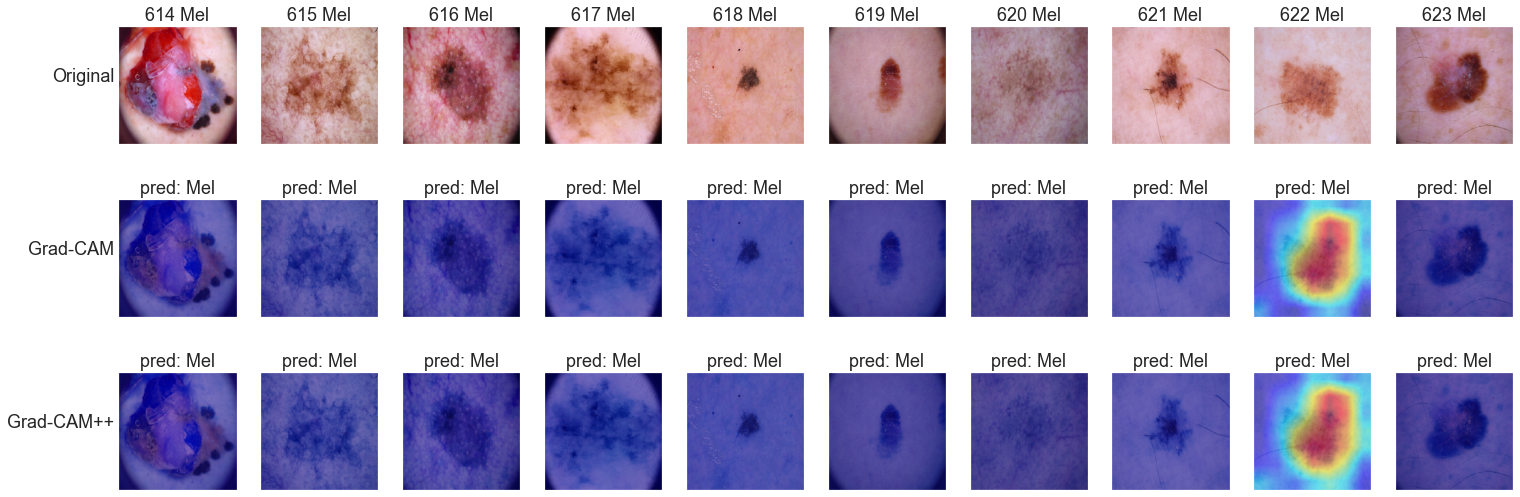

In [90]:
## mel
_compare(model=model, layer_name=model.layers[-5].name, target_cls=0)

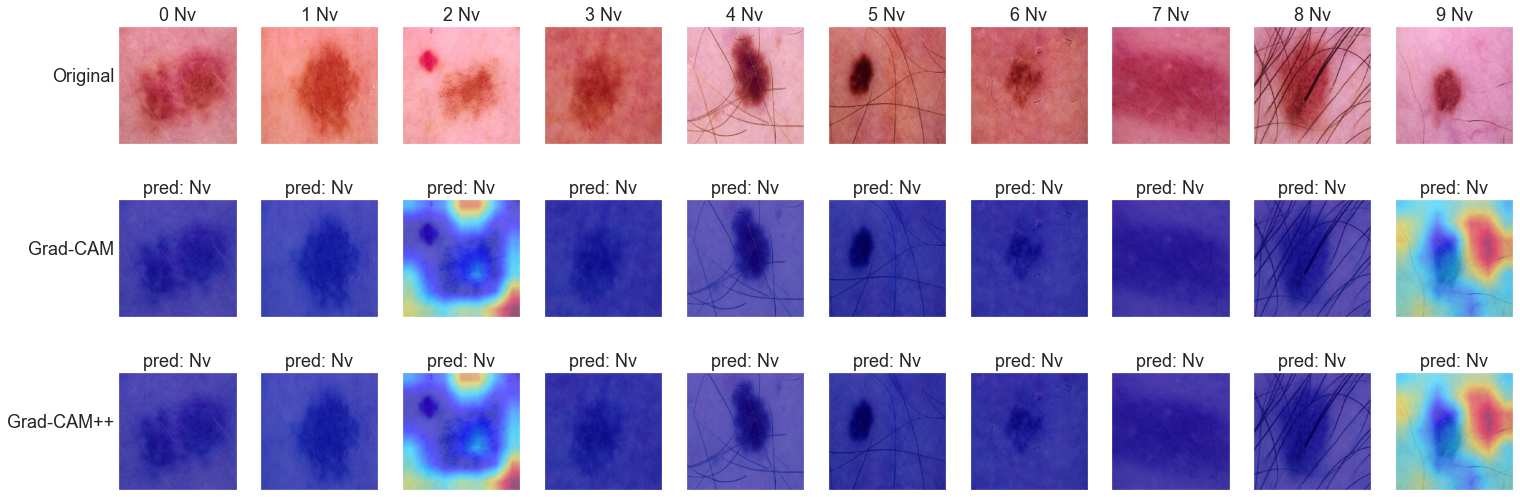

In [56]:
## nv
_compare(model=model, layer_name=model.layers[-5].name, target_cls=1)

#### For an Image

In [57]:
from PIL import Image

pathf1=r'D:\CSE\6,7, 8 SEMESTERS\FYP\Datasets\Evaluating dataset\Data\ISIC_0000370.JPG'
# pathf1='ISIC_0000365.JPG'
# pathf1='ISIC_0000382.JPG'
# pathf1='ISIC_0000416.JPG'
# pathf1='ISIC_0000521.JPG'

pathf2=pathf1.split('.')[0]+'_attribute_pigment_network.PNG'
pathf3=pathf1.split('.')[0]+'_attribute_negative_network.PNG'
pathf4=pathf1.split('.')[0]+'_attribute_globules.PNG'
pathf5=pathf1.split('.')[0]+'_attribute_streaks.PNG'
pathf6=pathf1.split('.')[0]+'_attribute_milia_like_cyst.PNG'

img = np.array(load_img(pathf1,target_size=(224,224,3)),dtype=np.float64)
img2 = np.array(load_img(pathf2,target_size=(224,224)),dtype=np.float64)
img3 = np.array(load_img(pathf3,target_size=(224,224)),dtype=np.float64)
img4 = np.array(load_img(pathf4,target_size=(224,224)),dtype=np.float64)
img5 = np.array(load_img(pathf5,target_size=(224,224)),dtype=np.float64)
img6 = np.array(load_img(pathf6,target_size=(224,224)),dtype=np.float64)
# # img = np.expand_dims(img,axis=0)
# img = preprocess_input(img)
# img=img/255

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


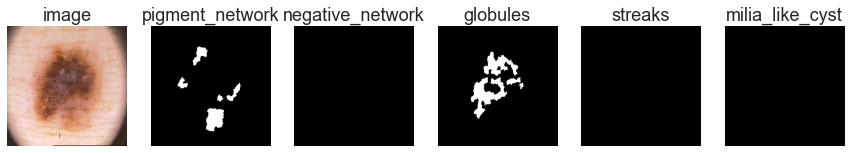

In [158]:
W_grid=6
L_grid=1
fig,axes = plt.subplots(L_grid,W_grid,figsize=(15,15))
axes=axes.ravel()

# index=np.random.randint(0,n_training) #Pick a random number 
axes[0].imshow(img/255)
axes[0].set_title("image") #Prints labels on top of the picture
axes[0].axis('off')

axes[1].imshow(img2)
axes[1].set_title("pigment_network") #Prints labels on top of the picture
axes[1].axis('off')
plt.subplots_adjust(hspace=0.5)

axes[2].imshow(img3)
axes[2].set_title("negative_network") #Prints labels on top of the picture
axes[2].axis('off')
plt.subplots_adjust(hspace=0.5)

axes[3].imshow(img4)
axes[3].set_title("globules") #Prints labels on top of the picture
axes[3].axis('off')
plt.subplots_adjust(hspace=0.5)

axes[4].imshow(img5)
axes[4].set_title("streaks") #Prints labels on top of the picture
axes[4].axis('off')
plt.subplots_adjust(hspace=0.5)

axes[5].imshow(img6)
axes[5].set_title("milia_like_cyst") #Prints labels on top of the picture
axes[5].axis('off')
plt.subplots_adjust(hspace=0.5)

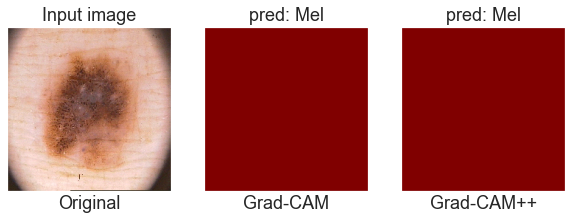

In [88]:
# grad_cam and  grad_cam_plus_plus for the input image
# ISIC_0000403
_compare_an_image(model,img,model.layers[-5].name)

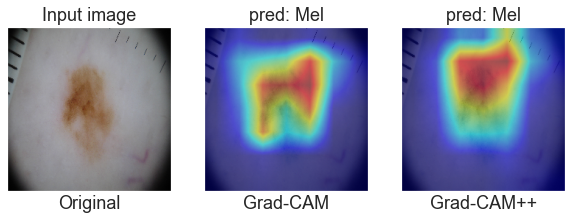

In [153]:
# grad_cam and  grad_cam_plus_plus for the input image
# ISIC_0000403
_compare_an_image(model,img,model.layers[-5].name)

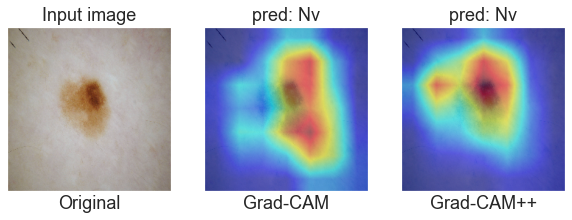

In [150]:
# grad_cam and  grad_cam_plus_plus for the input image
# ISIC_0000427
_compare_an_image(model,img,model.layers[-5].name)

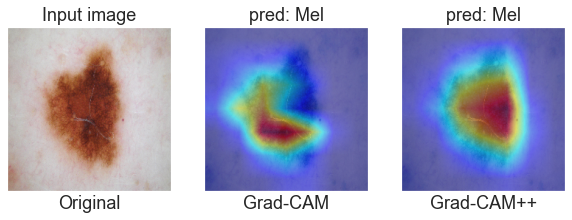

In [147]:
# grad_cam and  grad_cam_plus_plus for the input image
# ISIC_0000427
_compare_an_image(model,img,model.layers[-5].name)

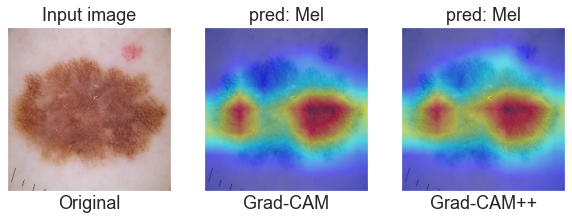

In [117]:
# grad_cam and  grad_cam_plus_plus for the input image
# ISIC_0000521
_compare_an_image(model,img,model.layers[-5].name)

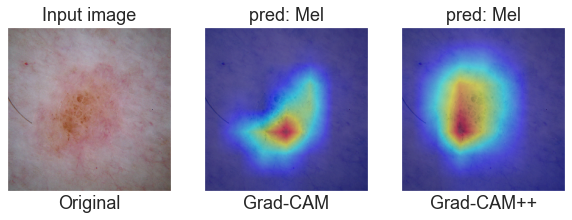

In [111]:
# grad_cam and  grad_cam_plus_plus for the input image
# ISIC_0000370
_compare_an_image(model,img,model.layers[-5].name)

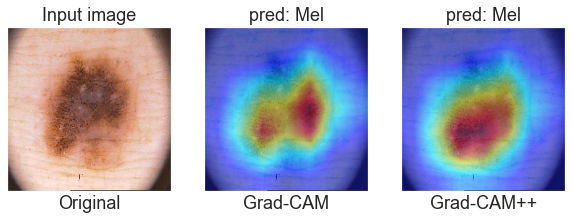

In [99]:
# grad_cam and  grad_cam_plus_plus for the input image
# ISIC_0000370
_compare_an_image(model,img,model.layers[-5].name)

## Epoch 100

In [568]:
# grad_cam and  grad_cam_plus_plus for the input image
# ISIC_0000365
_compare_an_image(model_100_1,img,model_100_1.layers[-5].name)

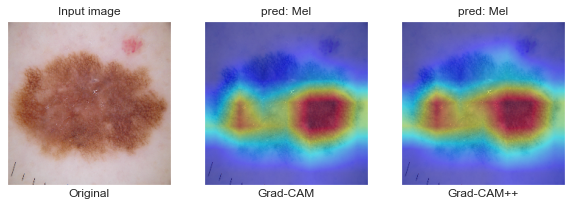

In [502]:
# grad_cam and  grad_cam_plus_plus for the input image
# ISIC_0000365
_compare_an_image(model_100_1,img,model_100_1.layers[-5].name)

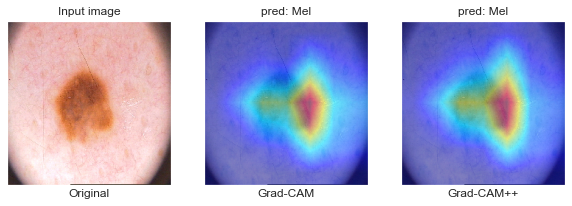

In [499]:
# grad_cam and  grad_cam_plus_plus for the input image
# ISIC_0000365
_compare_an_image(model_100_1,img,model_100_1.layers[-5].name)

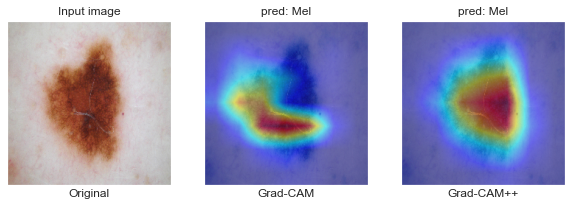

In [496]:
# grad_cam and  grad_cam_plus_plus for the input image
# ISIC_0000427
_compare_an_image(model_100_1,img,model_100_1.layers[-5].name)

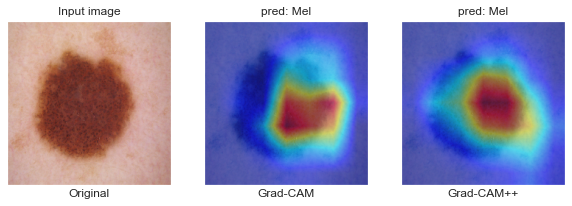

In [486]:
# grad_cam and  grad_cam_plus_plus for the input image
# ISIC_0000421
_compare_an_image(model_100_1,img,model_100_1.layers[-5].name)

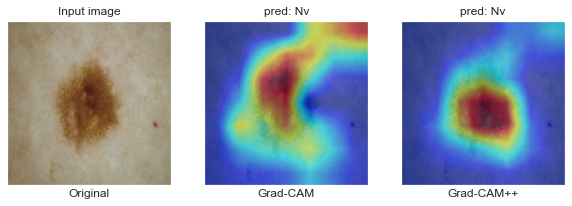

In [482]:
# grad_cam and  grad_cam_plus_plus for the input image
# ISIC_0000421
_compare_an_image(model_100_1,img,model_100_1.layers[-5].name)

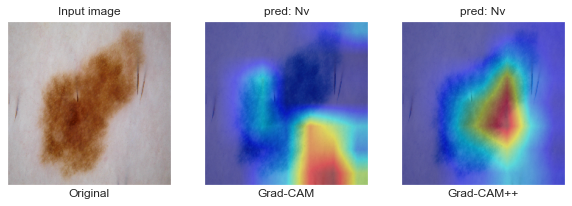

In [478]:
# grad_cam and  grad_cam_plus_plus for the input image
# ISIC_0000419
_compare_an_image(model_100_1,img,model_100_1.layers[-5].name)

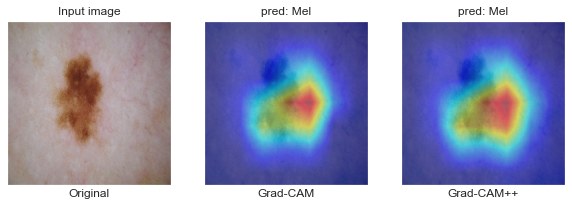

In [473]:
# grad_cam and  grad_cam_plus_plus for the input image
# ISIC_0000416
_compare_an_image(model_100_1,img,model_100_1.layers[-5].name)

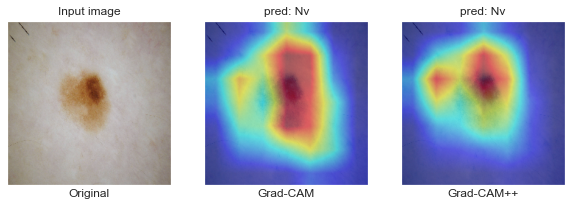

In [460]:
# grad_cam and  grad_cam_plus_plus for the input image
# ISIC_0000409
_compare_an_image(model_100_1,img,model_100_1.layers[-5].name)

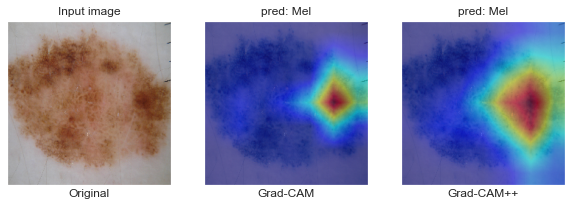

In [456]:
# grad_cam and  grad_cam_plus_plus for the input image
# ISIC_0000408
_compare_an_image(model_100_1,img,model_100_1.layers[-5].name)

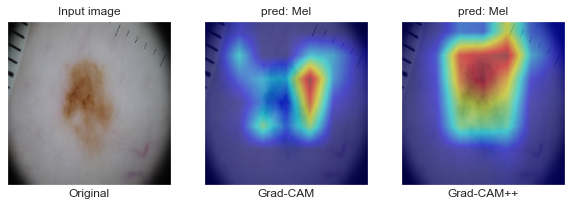

In [449]:
# grad_cam and  grad_cam_plus_plus for the input image
# ISIC_0000403
_compare_an_image(model_100_1,img,model_100_1.layers[-5].name)

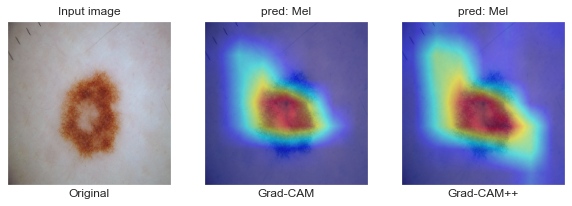

In [415]:
# grad_cam and  grad_cam_plus_plus for the input image
# ISIC_0000386
_compare_an_image(model_100_1,img,model_100_1.layers[-5].name)

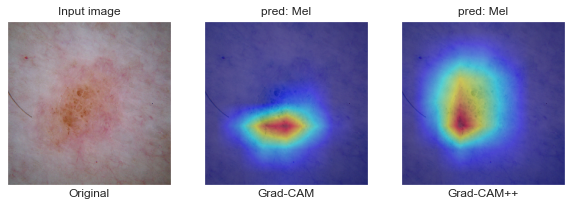

In [404]:
# grad_cam and  grad_cam_plus_plus for the input image
# ISIC_0000382
_compare_an_image(model_100_1,img,model_100_1.layers[-5].name)

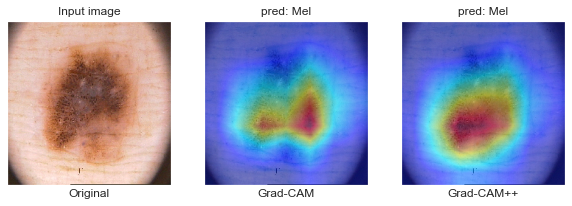

In [392]:
# grad_cam and  grad_cam_plus_plus for the input image
# ISIC_0000370
_compare_an_image(model_100_1,img,model_100_1.layers[-5].name)

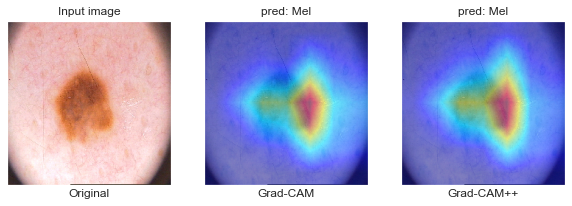

In [381]:
# grad_cam and  grad_cam_plus_plus for the input image
# ISIC_0000358
_compare_an_image(model_100_1,img,model_100_1.layers[-5].name)

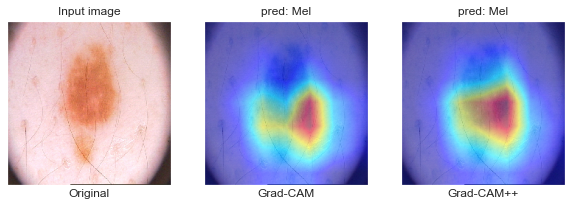

In [365]:
# grad_cam and  grad_cam_plus_plus for the input image
# ISIC_0000358
_compare_an_image(model_100_1,img,model_100_1.layers[-5].name)

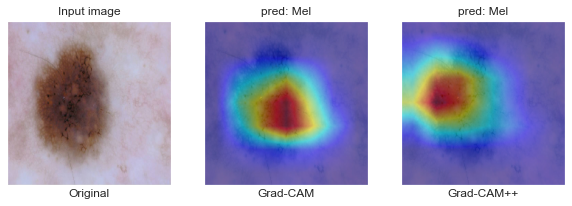

In [352]:
# grad_cam and  grad_cam_plus_plus for the input image
# ISIC_0000067
_compare_an_image(model_100_1,img,model_100_1.layers[-5].name)

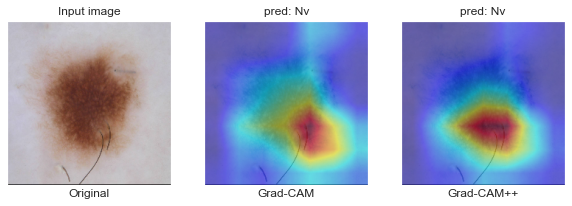

In [334]:
# grad_cam and  grad_cam_plus_plus for the input image
# ISIC_0000059
_compare_an_image(model_100_1,img,model_100_1.layers[-5].name)

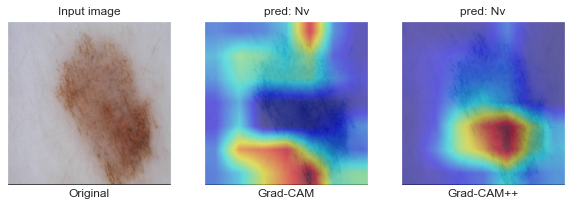

In [326]:
# grad_cam and  grad_cam_plus_plus for the input image
# ISIC_0000055
_compare_an_image(model_100_1,img,model_100_1.layers[-5].name)

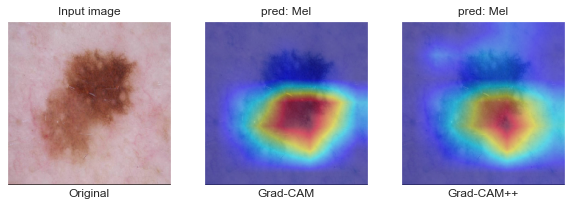

In [318]:
# grad_cam and  grad_cam_plus_plus for the input image
# ISIC_0000051
_compare_an_image(model_100_1,img,model_100_1.layers[-5].name)

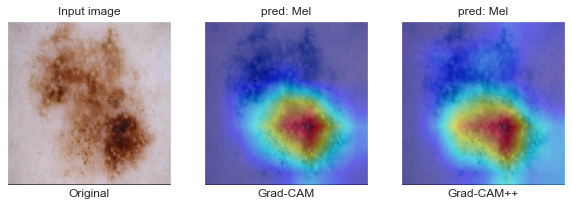

In [311]:
# grad_cam and  grad_cam_plus_plus for the input image
# ISIC_0000049
_compare_an_image(model_100_1,img,model_100_1.layers[-5].name)

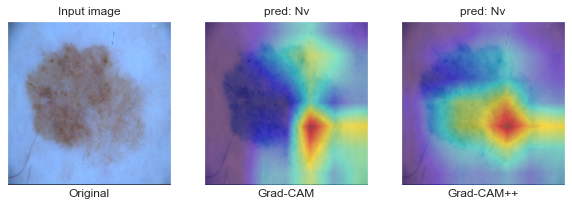

In [303]:
# grad_cam and  grad_cam_plus_plus for the input image
# ISIC_0000046
_compare_an_image(model_100_1,img,model_100_1.layers[-5].name)

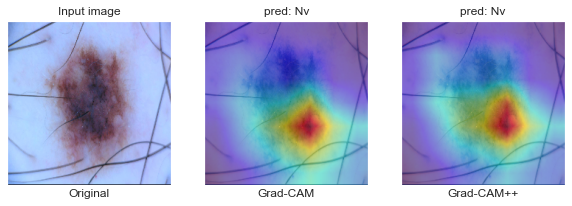

In [293]:
# grad_cam and  grad_cam_plus_plus for the input image
# ISIC_0000042
_compare_an_image(model_100_1,img,model_100_1.layers[-5].name)

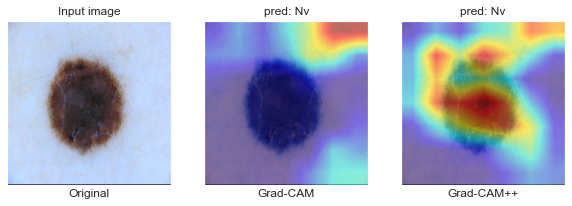

In [286]:
# grad_cam and  grad_cam_plus_plus for the input image
# ISIC_0000039
_compare_an_image(model_100_1,img,model_100_1.layers[-5].name)

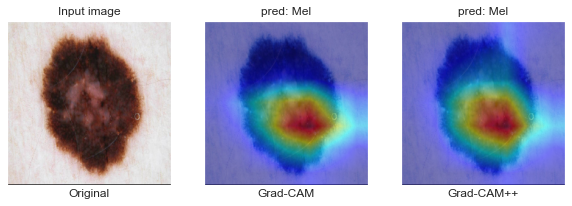

In [261]:
# ISIC_0000029
_compare_an_image(model_100_1,img,model_100_1.layers[-5].name)

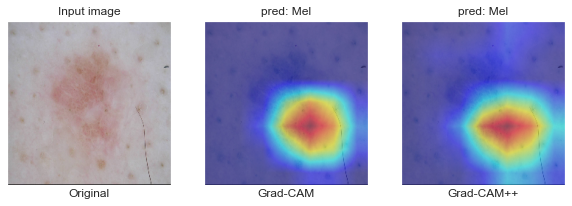

In [243]:
# ISIC_0000024
_compare_an_image(model_100_1,img,model_100_1.layers[-5].name)

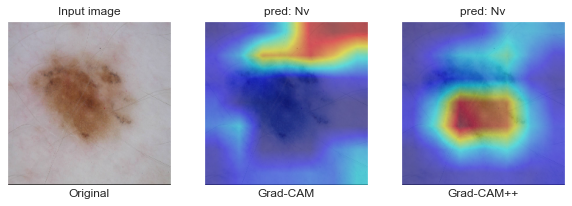

In [228]:
# ISIC_0000018
_compare_an_image(model_100_1,img,model_100_1.layers[-5].name)